# QF620 Project Group 5 Part 2

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 999

# Part 1 (Analytical Option Formulae)

## Black-Scholes Formula

Black-Scholes formula (Vanilla Call)

\begin{equation}
\begin{split}
C(S_0,K,r,\sigma,T) &= S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)\\
\end{split}            
\end{equation}

In [3]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

Black-Scholes formula (Vanilla Put)

\begin{equation}
\begin{split}
P(S_0,K,r,\sigma,T) &= K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)\\
\end{split}            
\end{equation}

In [4]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

Where:
\begin{equation}
\begin{split}
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

## Bachelier Model

Bachelier formula (Vanilla Call)

\begin{equation}
\begin{split}
C(S_0,K,r,\sigma,T) &= \big[(S_0 - K) \Phi(d_1) + \sigma S_0 \sqrt{T}\phi(d_1) \big]\\
\end{split}            
\end{equation}

In [5]:
def BachelierCall(S, K, r, sigma, T):
    d1 = (S-K)/(sigma*S*np.sqrt(T))
    return ((S-K)*norm.cdf(d1) + sigma*S*np.sqrt(T)*norm.pdf(d1))


Bachelier formula (Vanilla Put)

\begin{equation}
\begin{split}
P(S_0,K,r,\sigma,T) &= \big[(K - S_0) \Phi(-d_1) + \sigma S_0 \sqrt{T}\phi(d_1)\big]\\
\end{split}            
\end{equation}

In [6]:
def BachelierPut(S, K, r, sigma, T):
    d1 = (S-K)/(sigma*S*np.sqrt(T))
    return ((K-S)*norm.cdf(-d1) + sigma*S*np.sqrt(T)*norm.pdf(d1))


Where:
\begin{equation}
\begin{split}
            d_1 &= \frac{S_0 - K}{\sigma S_0 \sqrt{T}}\\
\end{split}            
\end{equation}

## Black76 Model

Black76 formula (Vanilla Call)

\begin{equation}
\begin{split}
C(F_0,K,r,\sigma,T) &= e^{-rT}\big[F_0 \Phi(d_1) - K \Phi(d_2)\big]\\
\end{split}            
\end{equation}

In [7]:
def Black76Call(F, K, r, sigma, T):
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(F*norm.cdf(d1) - K*norm.cdf(d2))

Black76 formula (Vanilla Put)

\begin{equation}
\begin{split}
P(F_0,K,r,\sigma,T) &= e^{-rT}\big[K \Phi(-d_2) - F_0 \Phi(-d_1)\big]\\
\end{split}            
\end{equation}

In [8]:
def Black76Put(F, K, r, sigma, T):
    d1 = (np.log(F/K)+(sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*(K*norm.cdf(-d2) - F*norm.cdf(-d1))

Where:
\begin{equation}
\begin{split}
            d_1 &= \frac{\log \frac{F_0}{K} +
            \left(\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

## Displaced-Diffusion Model

Displaced-Diffusion formula (Vanilla Call)

\begin{equation}
\begin{split}
C(F_0,K,r,\sigma,T,\beta) &= e^{-rT}\bigg[\frac{F_0}{\beta} \Phi(d_1) - \bigg(K + \frac{1 - \beta}{\beta} F_0 \bigg) \Phi(d_2)\bigg]\\
\end{split}            
\end{equation}

In [9]:
def DisplacedDiffusionCall(F, K, r, sigma, T, beta):
    
    d1 = (np.log((F/beta)/(K+(1-beta)/beta*F))+((sigma**2)*(beta**2)/2)*T) / (sigma*beta*np.sqrt(T))
    d2 = d1 - sigma*beta*np.sqrt(T)
    return np.exp(-r*T) * ((F/beta)*norm.cdf(d1) - (K + (1-beta)/beta*F)*norm.cdf(d2))


Displaced-Diffusion formula (Vanilla Put)

\begin{equation}
\begin{split}
P(F_0,K,r,\sigma,T,\beta) &= e^{-rT}\bigg[\bigg(K + \frac{1 - \beta}{\beta} F_0 \bigg) \Phi(-d_2) - \frac{F_0}{\beta} \Phi(-d_1)\bigg]\\
\end{split}            
\end{equation}

In [10]:
def DisplacedDiffusionPut(F, K, r, sigma, T, beta):
    d1 = (np.log((F/beta)/(K+(1-beta)/beta*F))+((sigma**2)*(beta**2)/2)*T) / (sigma*beta*np.sqrt(T))
    d2 = d1 - sigma*beta*np.sqrt(T)
    return np.exp(-r*T) * ((K + (1-beta)/beta*F)*norm.cdf(-d2) - (F/beta)*norm.cdf(-d1))


Where:
\begin{equation}
\begin{split}
            d_1 &= \frac{\log \frac{\frac{F_0}{\beta}}{K+\frac{1-\beta}{\beta}F_0} +
            \left(\frac{\sigma^2 \beta^2}{2}\right)T}{\sigma\beta\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}

# Part 2 (Model Calibration)

In [11]:
from scipy.optimize import brentq
import pandas as pd
import datetime

In [12]:
# date filenames
fn_call = 'goog_call.csv'
fn_put = 'goog_put.csv'
fn_discount = 'discount.csv'

In [13]:
# import data
call = pd.read_csv(fn_call, index_col = 'date', parse_dates = True)
put = pd.read_csv(fn_put, index_col = 'date', parse_dates = True)
discount = pd.read_csv(fn_discount)

# convert expiry date to datetime format
call['expiry'] = pd.to_datetime(call['expiry'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d')))
put['expiry'] = pd.to_datetime(put['expiry'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d')))

In [14]:
# interpolate discount rates
zeros = pd.DataFrame(np.zeros(discount.Day.max()+1), columns = ['dummy'])
discount_ = discount.set_index('Day')
combined = pd.concat((zeros, discount_), axis = 1).drop(columns = 'dummy')
disc = combined.interpolate()/100
disc.rename(columns = {'Rate (%)': 'Rate'}, inplace = True)
disc


,Rate
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3578,0.032268
3579,0.032273
3580,0.032278
3581,0.032283


In [15]:
# params
goog_price = 846.9
beta_SABR = 0.8

In [16]:
call['time_to_maturity_days'] = (call['expiry'] - call.index).dt.days
put['time_to_maturity_days'] = (put['expiry'] - put.index).dt.days

In [17]:
call['price'] = call.eval('(best_bid + best_offer)/2')
put['price'] = put.eval('(best_bid + best_offer)/2')

In [18]:
call['discount'] = disc.loc[call.time_to_maturity_days].values
put['discount'] = disc.loc[put.time_to_maturity_days].values

In [19]:
call['time_to_maturity'] = call['time_to_maturity_days']/365
put['time_to_maturity'] = put['time_to_maturity_days']/365

In [20]:
call['forward_price'] = goog_price * np.exp(call.discount * call.time_to_maturity)
put['forward_price'] = goog_price * np.exp(put.discount * put.time_to_maturity)


## Implied Volatility Plot

### Black76 Model

In [21]:
def impliedCallVolatility_black76(F, K, r, price, T):
    try:
        impliedVol = brentq(lambda x: price -
                        Black76Call(F, K, r, x, T),
                        1e-6, 1)
    except:
        impliedVol = np.nan

    return impliedVol

In [22]:
def impliedPutVolatility_black76(F, K, r, price, T):
    try:
        impliedVol = brentq(lambda x: price -
                        Black76Put(F, K, r, x, T),
                        1e-6, 1)
    except:
        impliedVol = np.nan
    return impliedVol

In [23]:
# this helps to convert prices generated from the different models to implied vol
def implied_vol_black76(F, K, r, price, T):
    if F > K:
        return impliedPutVolatility_black76(F, K, r, price, T)
    if F < K:
        return impliedCallVolatility_black76(F, K, r, price, T)

### Black-Scholes Model

In [24]:
def impliedCallVolatility_blackscholes(S, K, r, price, T):
    try:
        impliedVol = brentq(lambda x: price -
                        BlackScholesCall(S, K, r, x, T),
                        1e-6, 1)

    except:
        impliedVol = np.nan

    return impliedVol

In [25]:
def impliedPutVolatility_blackscholes(S, K, r, price, T):
    try:
        impliedVol = brentq(lambda x: price -
                        BlackScholesPut(S, K, r, x, T),
                        1e-6, 1)

    except:
        impliedVol = np.nan
        

    return impliedVol

In [26]:
# this helps to convert prices generated from the different models to implied vol
def implied_vol_blackscholes(S, K, r, price, T):
    if S > K:
        return impliedPutVolatility_blackscholes(S, K, r, price, T)
    elif S < K:
        return impliedCallVolatility_blackscholes(S, K, r, price, T)

In [27]:
def black_scholes_price(S, K, r, sigma, T):
    if K < S:
        price = BlackScholesPut(S, K, r, sigma, T)
    elif K > S:
        price = BlackScholesCall(S, K, r, sigma, T)
    return price

### Checkpoint:
- ITM options are difficult to price (results in absence of a root solution)

### Generating Market Implied Vol Smile

In [28]:
# generate df with the out-of-the-money (OTM) data for market-implied volatility
OTM_call = call[call.strike > goog_price].copy()
OTM_put = put[put.strike < goog_price].copy()
OTM_df = pd.concat((OTM_put, OTM_call))

In [29]:
# store constant values
r = OTM_df.discount[0]
T = OTM_df.time_to_maturity[0]
F = OTM_df.forward_price[0]

In [30]:
OTM_df['impliedvol'] = np.vectorize(implied_vol_blackscholes)(goog_price, 
                                                 OTM_df.strike,
                                                 r,
                                                 OTM_df.price,
                                                 T)

In [31]:
vol_smile_df = OTM_df[['strike', 'impliedvol']]
vol_smile_df

,strike,impliedvol
date,,
2013-08-30,320,0.393102
2013-08-30,340,0.361520
2013-08-30,350,0.365782
2013-08-30,360,0.355104
2013-08-30,370,0.348660
2013-08-30,380,0.348356
2013-08-30,390,0.340733
2013-08-30,400,0.337852
2013-08-30,410,0.331197


In [32]:
strike_lower = OTM_df[OTM_df.strike < goog_price].strike.iloc[-1]
strike_upper = OTM_df[OTM_df.strike > goog_price].strike.iloc[0]

# calculate estimated ATM vol
volATM_lower = vol_smile_df.query('strike < @goog_price').impliedvol[-1]
volATM_higher = vol_smile_df.query('strike > @goog_price').impliedvol[0]

lower_vol = np.min

# interpolate
vol_ATM = (strike_upper - goog_price)/(strike_upper - strike_lower)*abs(volATM_lower - volATM_higher) + np.min([volATM_higher,volATM_lower])
vol_ATM # this is the vol to use for displaced-diffusion

0.2596500836618964

In [33]:
OTM_df['blackscholes_prices'] = np.vectorize(black_scholes_price)(goog_price,
                                                                  OTM_df['strike'],
                                                                  r,
                                                                  vol_ATM,
                                                                  T)

#### Bachelier Model

In [34]:
def bachelier_price(S, K, r, sigma_norm, T):
    if S <= K:
        return BachelierCall(S, K, r, sigma_norm, T)
    elif S > K:
        return BachelierPut(S, K, r, sigma_norm, T)
    

In [35]:
# calculate ATM price
blackscholes_call = BlackScholesCall(goog_price,
                                     goog_price*np.exp(r*T),
                                     r,
                                     vol_ATM,
                                     T)
blackscholes_put = BlackScholesPut(goog_price,
                                     goog_price*np.exp(r*T),
                                     r,
                                     vol_ATM,
                                     T)

#check call and put are same prices
if (np.round(blackscholes_call,5) == np.round(blackscholes_put,5)):
    ATM_price = blackscholes_call
    print('ATM price = %.5f' % ATM_price)
else:
    print('error')

ATM price = 102.78853


In [36]:
def impliedVolatility_bachelier(S, K, r, ATM_price, T):
    try:
        impliedVol_call = brentq(lambda x: ATM_price -
                        BachelierCall(S, K, r, x, T),
                        1e-6, 1)
        impliedVol_put = brentq(lambda x: ATM_price -
                        BachelierPut(S, K, r, x, T),
                        1e-6, 1)
        impliedVol = (impliedVol_call+impliedVol_put)/2
    except:
        impliedVol = np.nan

    return impliedVol

In [37]:
# calculating ATM sigma norm
sigma_norm = impliedVolatility_bachelier(goog_price, 
                                             goog_price*np.exp(r*T), 
                                             r, 
                                             ATM_price, 
                                             T)
sigma_norm

0.25860023479370225

In [38]:
OTM_df['bachelier_prices'] = np.vectorize(bachelier_price)(goog_price,
                                                            OTM_df['strike'],
                                                            r,
                                                            sigma_norm,
                                                            T)


In [39]:
OTM_df['bachelier_impliedvol'] = np.vectorize(implied_vol_blackscholes)(goog_price, 
                                                           OTM_df.strike,
                                                           r,
                                                           OTM_df.bachelier_prices,
                                                           T)

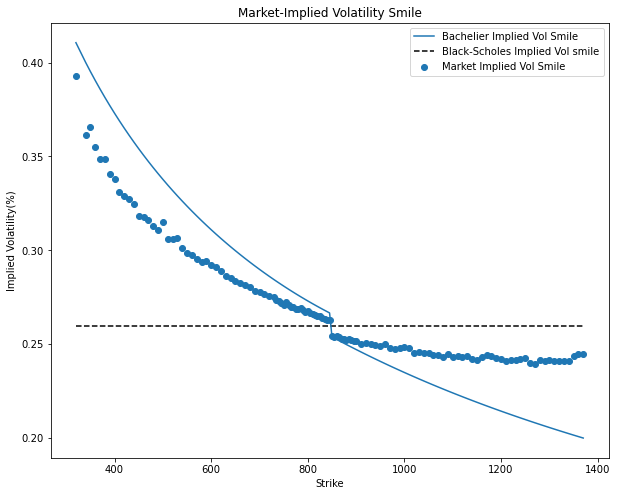

In [40]:
plt.figure(figsize = (10,8))
plt.hlines(vol_ATM, xmin = OTM_df.strike.min(), xmax = OTM_df.strike.max(), linestyles = '--', label = 'Black-Scholes Implied Vol smile')
plt.scatter(OTM_df.strike, OTM_df.impliedvol, label = 'Market Implied Vol Smile')
plt.plot(OTM_df.strike, OTM_df.bachelier_impliedvol, label = 'Bachelier Implied Vol Smile')
plt.title('Market-Implied Volatility Smile')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility(%)')
plt.legend();

### Displaced-Diffusion Model

In [41]:
def displaced_diffusion_price(F, K, r, sigma, T, beta):
    if K < F:
        price = DisplacedDiffusionPut(F, K, r, sigma, T, beta)
    elif K > F:
        price = DisplacedDiffusionCall(F, K, r, sigma, T, beta)
    else:
        None
    return price

In [42]:
# Using the generated implied vol ATM (vol_ATM), fit it to Displaced-diffusion model
# then optimize for beta to minimize price differences

from scipy.optimize import least_squares

#x is beta only
def DD_calibration(x, F, strikes, prices, r, T):
    err = 0.0
    for i, price in enumerate(prices):
        err += (price - displaced_diffusion_price(F,
                                                  strikes[i],
                                                  r,
                                                  vol_ATM,
                                                  T,
                                                  x[0]))**2
    
    return err

df = OTM_df

# initial guess of beta
initialGuess = [0.8]

res = least_squares(lambda x: DD_calibration(x,
                                             F,
                                             df['strike'],
                                             df['price'],
                                             r,
                                             T),
                    initialGuess)


beta = res.x[0]

print('Calibrated Displaced-Diffusion model parameters: sigma = %.4f, beta = %.4f' % (vol_ATM, beta))


Calibrated Displaced-Diffusion model parameters: sigma = 0.2597, beta = 0.4253


In [43]:
# generate prices using Displaced-Diffusion model based on calibrated beta
OTM_df['dd_prices'] = np.vectorize(displaced_diffusion_price)(F,
                                              OTM_df.strike,
                                              r,
                                              vol_ATM,
                                              T,
                                              beta) 


In [44]:
# generate implied vol of Displaced-Diffusion model using inverse function of Black76 model
OTM_df['dd_impliedvol'] = np.vectorize(implied_vol_black76)(F,
                                                    OTM_df.strike,
                                                    r,
                                                    OTM_df.dd_prices,
                                                    T)

### checkpoint:
- note that implied vol using Black76 is used here since S (846.9) exceeds strike of 850 when taking the forward price.
- so when applying the price matching (displaced diffusion so it'll be from F's perspective), it'd be using put option to price. 
- but when implying the vol, it'll be using call to imply (if using black-scholes which uses S)

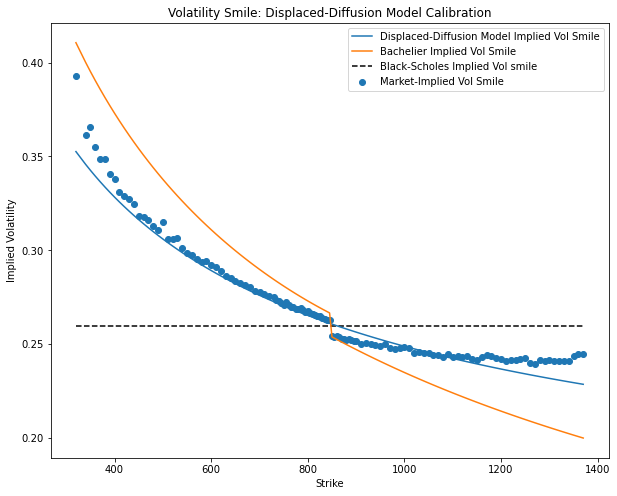

In [45]:
# plot results of both market-implied and displaced-diffusion model implied vol smile
plt.figure(figsize = (10,8))
plt.hlines(vol_ATM, xmin = OTM_df.strike.min(), xmax = OTM_df.strike.max(), linestyles = '--', label = 'Black-Scholes Implied Vol smile')
plt.plot(OTM_df.strike, OTM_df.dd_impliedvol, label = 'Displaced-Diffusion Model Implied Vol Smile')
plt.plot(OTM_df.strike, OTM_df.bachelier_impliedvol, label = 'Bachelier Implied Vol Smile')
plt.scatter(OTM_df.strike, OTM_df.impliedvol, label = 'Market-Implied Vol Smile')
plt.title('Volatility Smile: Displaced-Diffusion Model Calibration')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend();

#### Varying Beta Test:

In [46]:
beta_start = 0.001
beta_stop = 1
beta_step = 0.2

beta_range = np.arange(beta_start, beta_stop + beta_step, beta_step)

In [47]:
results_dd = []
for beta in beta_range:
    dd_prices_test = np.vectorize(displaced_diffusion_price)(OTM_df.forward_price,
                                                             OTM_df.strike,
                                                             r,
                                                             vol_ATM,
                                                             T,
                                                             beta)

    results_dd.append(np.vectorize(implied_vol_black76)(F,
                                             OTM_df.strike,
                                             r,
                                             dd_prices_test,
                                             T))
results_dd_df = pd.DataFrame(np.array(results_dd).T, columns = beta_range, index = OTM_df.strike)
                      

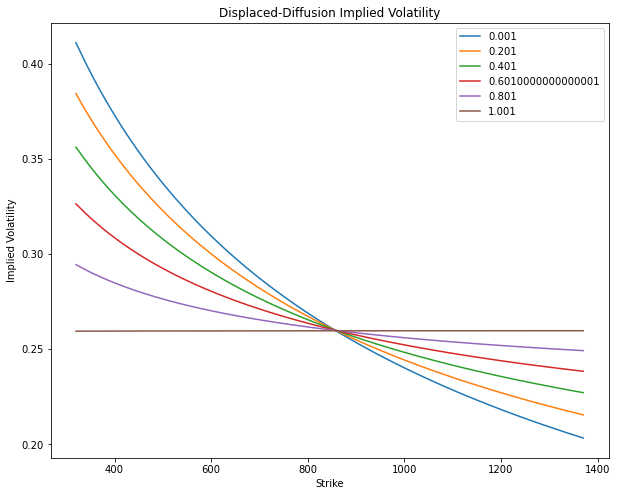

In [48]:
plt.figure(figsize = (10,8))
plt.plot(results_dd_df)
plt.legend(beta_range)
plt.title('Displaced-Diffusion Implied Volatility')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility');

### Interpretation of beta:
- beta measures the extent to which the model follows a lognormal distribution
- as beta increases from 0 (exclusive) to 1 (inclusive), the model becomes more lognormal in nature

### SABR Calibration

In [49]:
import pandas
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pylab as plt


def SABR(F, K, T, alpha, beta, rho, nu):
    X = K
    # if K is at-the-money-forward
    if abs(F - K) < 1e-12:
        numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
        numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
        sabrsigma = VolAtm
    else:
        z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
        zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
        numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
        numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
        numer3 = ((2 - 3*rho*rho)/24)*nu*nu
        numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
        denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
        denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
        denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
        sabrsigma = numer/denom

    return sabrsigma

In [50]:
from scipy.optimize import least_squares

def sabrcalibration(x, strikes, vols, F, T):
    err = 0.0
    for i, vol in enumerate(vols):
        err += (vol - SABR(F, strikes[i], T,
                           x[0], beta_SABR, x[1], x[2]))**2

    return err


#####
# Here, load DataFrame with strike and implied volatility information into "df"
#####

df = OTM_df

# populate "df" with the dataframe containing strikes and market implied volatilities

initialGuess = [0.02, 0.2, 0.1]
res = least_squares(lambda x: sabrcalibration(x,
                                              df['strike'],
                                              df['impliedvol'],
                                              F,
                                              T),
                    initialGuess)
alpha = res.x[0]
rho = res.x[1]
nu = res.x[2]

print('Calibrated SABR model parameters: alpha = %.3f, beta = %.3f, rho = %.3f, nu = %.3f' % (alpha, beta_SABR, rho, nu))

Calibrated SABR model parameters: alpha = 0.990, beta = 0.800, rho = -0.284, nu = 0.354


In [51]:
OTM_df['SABR_impliedvol'] = np.vectorize(SABR)(F,
                                               OTM_df['strike'],
                                               T,
                                               alpha, beta_SABR, rho, nu)

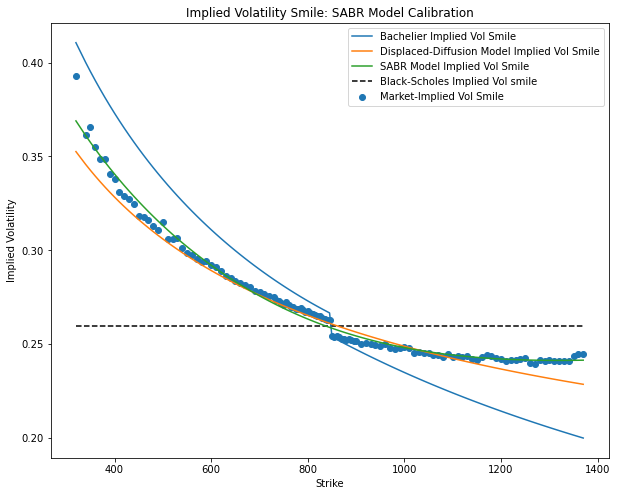

In [52]:
# plot results of both market-implied and SABR model implied vol smile
plt.figure(figsize = (10,8))
plt.hlines(vol_ATM, xmin = OTM_df.strike.min(), xmax = OTM_df.strike.max(), linestyles = '--', label = 'Black-Scholes Implied Vol smile')
plt.plot(OTM_df.strike, OTM_df.bachelier_impliedvol, label = 'Bachelier Implied Vol Smile')
plt.plot(OTM_df.strike, OTM_df.dd_impliedvol, label = 'Displaced-Diffusion Model Implied Vol Smile')
plt.plot(OTM_df.strike, OTM_df.SABR_impliedvol, label = 'SABR Model Implied Vol Smile')
plt.scatter(OTM_df.strike, OTM_df.impliedvol, label = 'Market-Implied Vol Smile')
plt.title('Implied Volatility Smile: SABR Model Calibration')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend();

In [53]:
# rho range
rho_start = -0.8
rho_stop = 0.8
rho_step = 0.4

rho_range = np.arange(rho_start, rho_stop + rho_step, rho_step)

# nu range
nu_start = 0.001
nu_stop = 1
nu_step = 0.2

nu_range = np.arange(nu_start, nu_stop + nu_step, nu_step)

In [54]:
results_rho_sabr = []
for rho_ in rho_range:
    results_rho_sabr.append(np.vectorize(SABR)(F,
                                               OTM_df.strike,
                                               T,
                                               alpha,
                                               beta_SABR,
                                               rho_,
                                               nu))
                                               
results_rho_sabr_df = pd.DataFrame(np.array(results_rho_sabr).T, columns = rho_range, index = OTM_df.strike)
                            

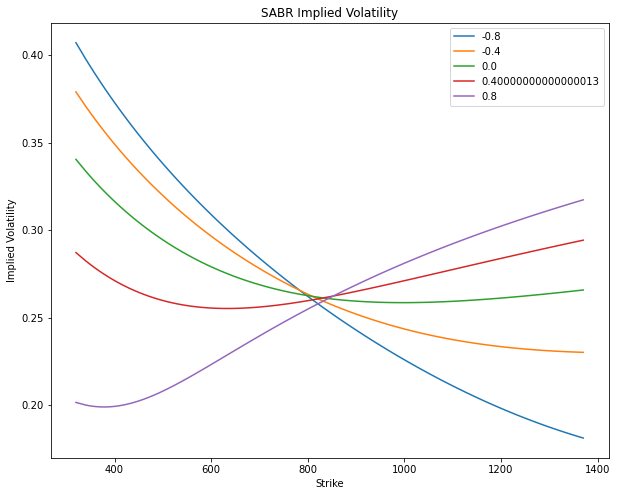

In [55]:
plt.figure(figsize = (10,8))
plt.plot(results_rho_sabr_df)
plt.legend(rho_range)
plt.title('SABR Implied Volatility')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility');

### Interpretation:
- rho controls the skewness of the implied volatility smile

In [56]:
results_nu_sabr = []
for nu_ in nu_range:
    results_nu_sabr.append(np.vectorize(SABR)(F,
                                               OTM_df.strike,
                                               T,
                                               alpha,
                                               beta_SABR,
                                               rho,
                                               nu_))
                                               
results_nu_sabr_df = pd.DataFrame(np.array(results_nu_sabr).T, columns = nu_range, index = OTM_df.strike)
                            

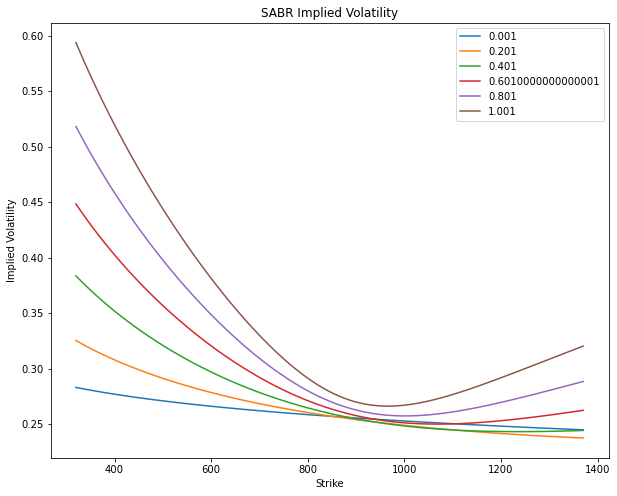

In [57]:
plt.figure(figsize = (10,8))
plt.plot(results_nu_sabr_df)
plt.legend(nu_range)
plt.title('SABR Implied Volatility')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility');

### Interpretation:
- nu is the volatility of volatility
- controls the extreme ends of the implied volatility smile
- the higher nu is, the higher the implied vol at the extreme ends will be